# Ссылки

## Документация
https://wildlifedatasets.github.io/wildlife-datasets/

https://wildlifedatasets.github.io/wildlife-tools/

## Датасеты
https://wildlifedatasets.github.io/wildlife-datasets/datasets/ (список датасетов от WildlifeDatasets)

https://www.kaggle.com/c/noaa-right-whale-recognition (датасет с китами, вид сверху)

# Функции и классы

In [ ]:
import os
import pickle
import random
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
def get_all_paths(root_dir):
    return [path for path in Path(root_dir).rglob("*.*")]


def find_child_folders(root_dir):
    return list(map(lambda e: root_dir + e, os.listdir(root_dir)))

In [ ]:
class DividedDataset:
    def __init__(self, train_path_list, test_path_list):
        self.train = train_path_list
        self.test = test_path_list

    def info(self):
        train_len = len(self.train)
        test_len = len(self.test)
        total_len = train_len + test_len
        print("Train: ", train_len, " (", train_len / total_len * 100, "%)")
        print("Test: ", test_len, " (", test_len / total_len * 100, "%)")
        print("Total: ", total_len)

    def image_info(self):
        train_len = 0
        for path in self.train:
            train_len += len(find_child_folders(path))

        test_len = 0
        for path in self.test:
            test_len += len(find_child_folders(path))

        total_len = train_len + test_len
        print("Train: ", train_len, " (", train_len / total_len * 100, "%)")
        print("Test: ", test_len, " (", test_len / total_len * 100, "%)")
        print("Total: ", total_len)

    def save(self):
        pickle.dump(self, file=open("./divided.pickle", "wb"))

    @classmethod
    def create(cls, train_path_list, test_path_list):
        return cls(train_path_list, test_path_list)

    @classmethod
    def load(cls):
        return pickle.load(open("./divided.pickle", "rb"))


def divide_train_test(dataset_path):
    """
    В тестовую выборку добавляется один случайный кроп из
    каждой особей
    """
    train_paths = []
    test_paths = []

    species_paths = find_child_folders("./Whale ReId 2/")

    for directory in species_paths:
        crop_paths = find_child_folders(directory + "/")
        crop_to_test_index = random.randint(0, len(crop_paths) - 1)
        for j in range(len(crop_paths)):
            if j == crop_to_test_index:
                test_paths.append(crop_paths[j])
            else:
                train_paths.append(crop_paths[j])

    return DividedDataset(train_paths, test_paths)

In [ ]:
class SberWhalesFrame:
    def __init__(self, paths, identity_dir_index):
        self.paths = paths
        self.identity_dir_index = identity_dir_index

    def to_metadata_dataframe(self):
        df_dict = {"image_id": [], "identity": [], "path": []}

        index = 0
        for i in range(len(self.paths)):
            cur_path = str(self.paths[i])
            identity = cur_path.split("/")[self.identity_dir_index]

            crops = get_all_paths(cur_path)
            for crop in crops:
                crop_string = str(crop)
                if crop_string.endswith(".png"):
                    continue
                df_dict["image_id"].append(index)
                df_dict["identity"].append(identity)
                df_dict["path"].append("\\".join(crop_string.split("\\")[1:]))
                index += 1

        return pd.DataFrame(df_dict)

# Аналитика

In [ ]:
print("Всего особей: ", len(find_child_folders("./Whale ReId 2/")))

Всего особей:  102


In [ ]:
print("Всего изображений: ", len(get_all_paths("./Whale ReId 2/")))

Всего изображений:  69028


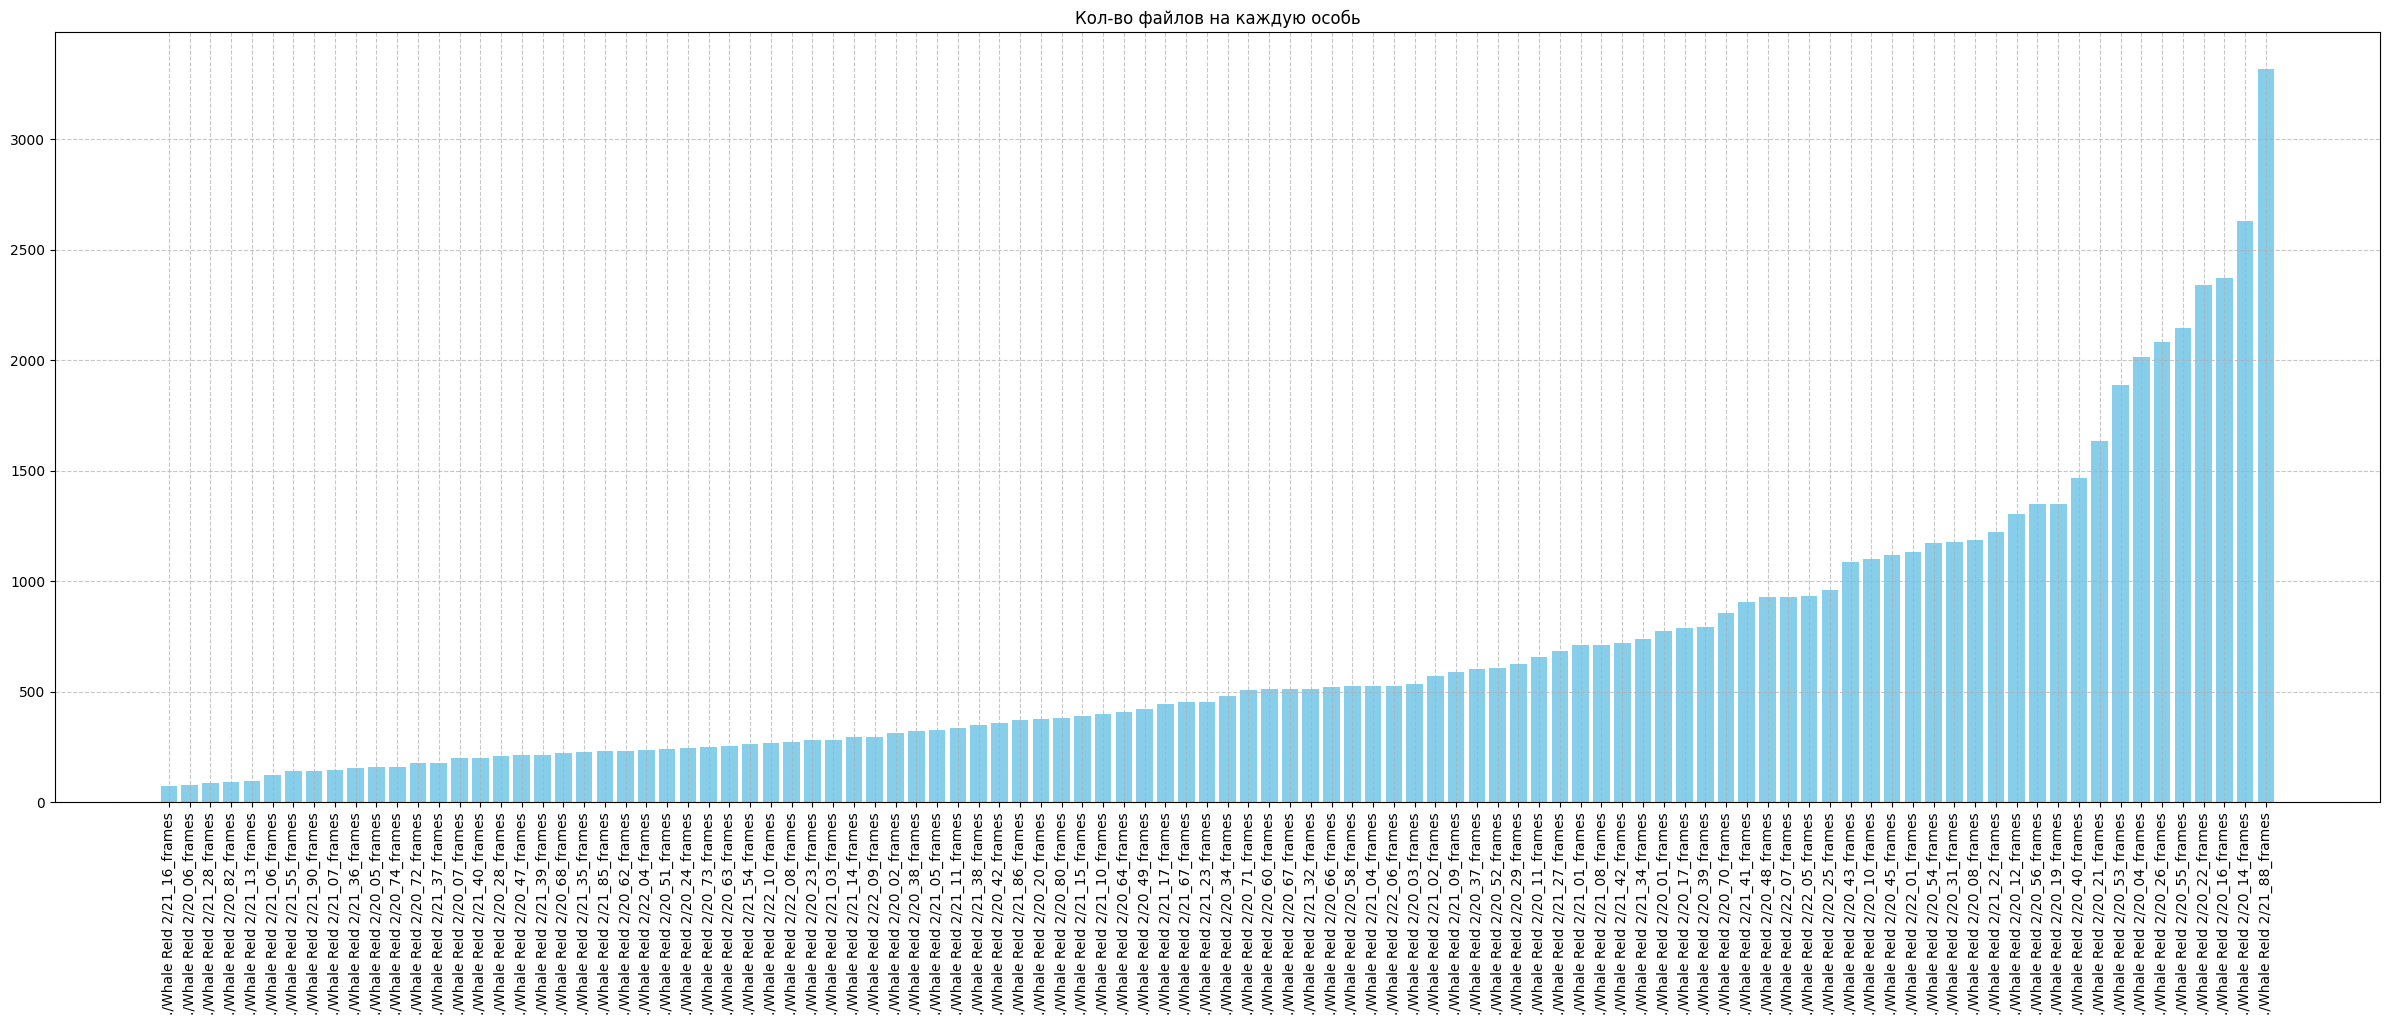

In [ ]:
entries = find_child_folders("./Whale ReId 2/")
pairs = [(path, len(get_all_paths(path))) for path in entries]
pairs = sorted(pairs, key=lambda e: e[1])

entries = list(map(lambda e: e[0], pairs))
values = list(map(lambda e: e[1], pairs))

plt.figure(figsize=(30, 10))
plt.title("Кол-во файлов на каждую особь")
plt.bar(entries, values, color="skyblue")
plt.grid(linestyle="--", alpha=0.7)
plt.xticks(ticks=range(len(entries)), labels=entries, rotation=90)
plt.show()